In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import networkx as nx

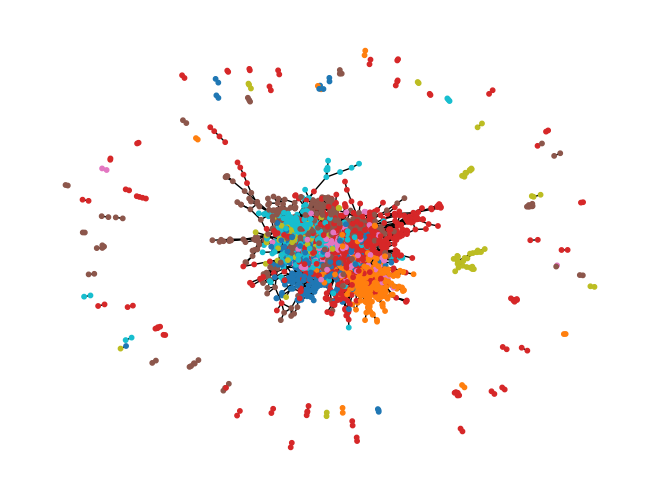

In [16]:
# Cora

# Edges
G = nx.read_edgelist(
    "../data/graphs/cora/cora.edges",
    delimiter=",",
    data=[("weight", int)],
    nodetype=int,
)

# Node labels
with open("../data/graphs/cora/cora.node_labels") as f:
    for line in f:
        node, label = line.strip().split(",")
        G.nodes[int(node)]["label"] = int(label)

# Draw with colors
nx.draw(
    G,
    node_color=[G.nodes[n]["label"] for n in G.nodes],
    cmap="tab10",
    node_size=10,
)

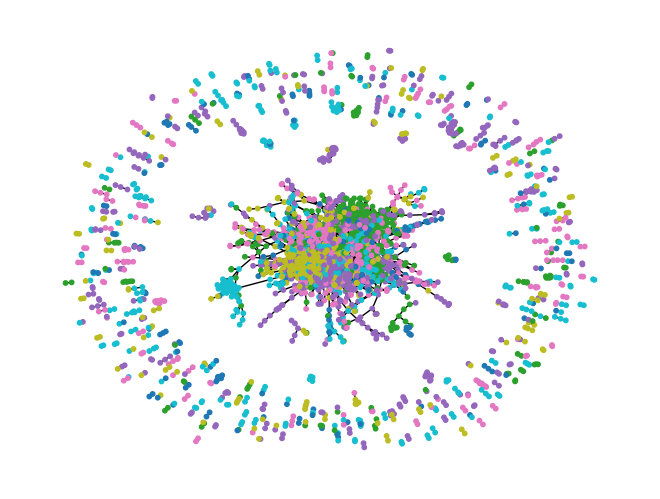

In [3]:
# CiteSeer

# Edges
G = nx.read_edgelist(
    "../data/graphs/citeseer/citeseer.edges",
    delimiter=",",
    data=[("weight", int)],
    nodetype=int,
)

# Node labels
with open("../data/graphs/citeseer/citeseer.node_labels") as f:
    for line in f:
        node, label = line.strip().split(",")
        G.nodes[int(node)]["label"] = int(label)

# Draw with colors
nx.draw(
    G,
    node_color=[G.nodes[n]["label"] for n in G.nodes],
    cmap="tab10",
    node_size=10,
)

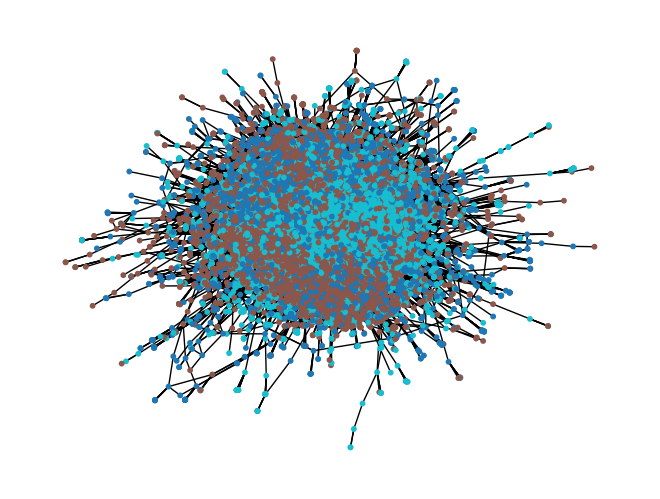

In [4]:
# PubMed

# CiteSeer

# Edges
G = nx.read_edgelist(
    "../data/graphs/pubmed/pubmed.edges",
    delimiter=",",
    data=[("weight", int)],
    nodetype=int,
)

# Node labels
with open("../data/graphs/pubmed/pubmed.node_labels") as f:
    for line in f:
        node, label = line.strip().split(",")
        G.nodes[int(node)]["label"] = int(label)

# Draw with colors
nx.draw(
    G,
    node_color=[G.nodes[n]["label"] for n in G.nodes],
    cmap="tab10",
    node_size=10,
)

In [7]:
# Load blood cell data
import embedders

embedders.dataloaders.load("blood_cells")

(tensor([[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]),
 ['0', '0', '0', '0', '0', ..., '9', '9', '9', '9', '9']
 Length: 94655
 Categories (10, object): ['0', '1', '2', '3', ..., '6', '7', '8', '9'])

In [9]:
embedders.dataloaders.load("lymphoma")

(tensor([[0.0000, 0.0000, 0.0000,  ..., 0.0011, 0.0000, 0.0000],
         [0.0000, 0.0098, 0.0028,  ..., 0.0000, 0.0000, 0.0000],
         [0.0003, 0.0000, 0.0014,  ..., 0.0010, 0.0000, 0.0000],
         ...,
         [0.0000, 0.0000, 0.0000,  ..., 0.0080, 0.0000, 0.0000],
         [0.0079, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         [0.0062, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]]),
 ['0', '0', '0', '0', '0', ..., '1', '1', '1', '1', '1']
 Length: 13410
 Categories (2, object): ['0', '1'])

In [11]:
# CIFAR-100

import pickle

train = pickle.load(open("../data/cifar_100/cifar-100-python/train", "rb"), encoding="bytes")

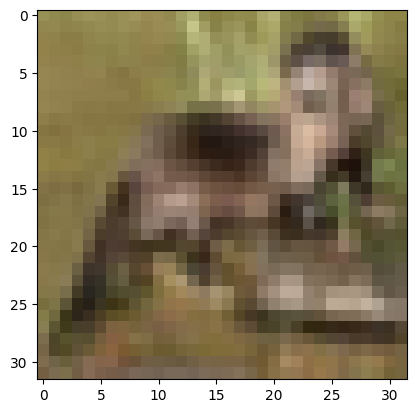

In [36]:
import matplotlib.pyplot as plt

plt.imshow(train[b"data"][100].reshape(3, 32, 32).transpose(1, 2, 0))

In [39]:
train[b"fine_labels"][100]

55

In [45]:
with open("../data/cifar_100/cifar-100-python/meta", "rb") as f:
    meta = pickle.load(f, encoding="bytes")

meta[b"fine_label_names"][55]

b'otter'

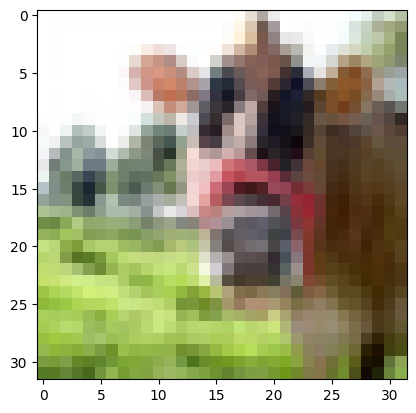

In [51]:
import embedders.dataloaders

plt.imshow(embedders.dataloaders.load("cifar_100")[0].detach().numpy())

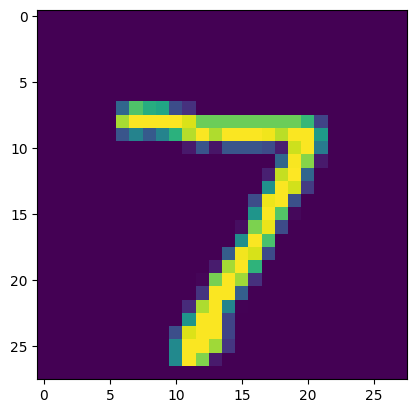

In [68]:
# MNIST
import torch

mnist_path = "/Users/phil/embedders/data/mnist/t10k-images-idx3-ubyte"

digits = []
with open(mnist_path, "rb") as f:
    f.read(16)
    while True:
        digit = f.read(28 * 28)
        if not digit:
            break
        digits.append(list(digit))

digits = torch.tensor(digits).reshape(-1, 28, 28)

plt.imshow(digits[0].numpy())

In [85]:
labels = []
with open("/Users/phil/embedders/data/mnist/t10k-labels-idx1-ubyte", "rb") as f:
    f.read(8)
    while True:
        label = f.read(1)
        if not label:
            break
        labels.append(int.from_bytes(label, byteorder="big"))
        # labels.append(int(label))

labels[0:10]

[7, 2, 1, 0, 4, 1, 4, 9, 5, 9]

In [3]:
from embedders.dataloaders import load_mnist

[len(x) for x in load_mnist(labels=True)]

[60000, 60000]